[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Accuracy: 0.5

Confusion Matrix:
 [[1 0]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.50      1.00      0.67         1
    positive       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


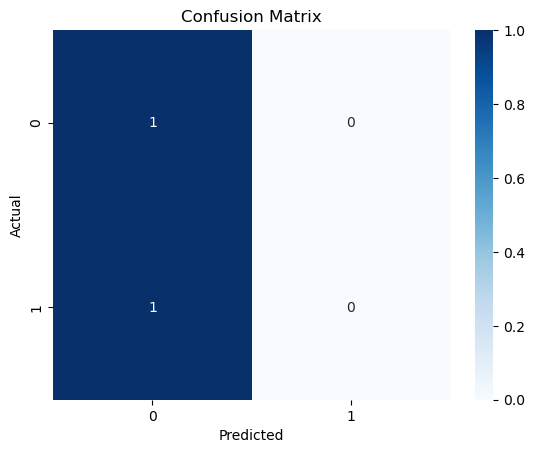

In [1]:
#  Import Required Libraries
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download stopwords from NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Sample Dataset (Can be replaced with a .csv file)
data = {
    'review': [
        'I love this product! It is amazing.',
        'Worst experience ever. I want my money back!',
        'Absolutely fantastic service.',
        'Terrible. Do not buy this.',
        'Great quality and fast shipping!',
        'Very bad. I am disappointed.',
        'Excellent performance. Highly recommended!',
        'Awful experience. Waste of time.',
        'Super happy with the results!',
        'Not satisfied. Poor product.'
    ],
    'sentiment': ['positive', 'negative', 'positive', 'negative', 'positive',
                  'negative', 'positive', 'negative', 'positive', 'negative']
}

df = pd.DataFrame(data)

# Preprocessing Function
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()                      # Convert to lowercase
    words = text.split()                     # Tokenize
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Apply Cleaning
df['cleaned_review'] = df['review'].apply(clean_text)

# Split Data
X = df['cleaned_review']
y = df['sentiment']

# TF-IDF Vectorization
tfidf = TfidfVectorizer()
X_vectorized = tfidf.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

#  Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

#  Predictions
y_pred = model.predict(X_test)

#  Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()